Insurance fraud occurs when “someone knowingly lies to obtain a benefit or advantage to which they are not otherwise entitled or someone knowingly denies a benefit that is due and to which someone is entitled.” The Coalition Against Insurance Fraud (CAIF) estimates that the annual losses due insurance fraud in America are $308 billion dollars, costs that are often borne not only by insurance companies, but higher premiums for insurance holders. Accordingly, insurance companies, government regulators, and others invest substantial resources annually in mitigating and identifying fraudulent claims.


Accordingly, in this project we will explore a health insurance fraud dataset and review potential factors that may determine when a subsequent claim will in fact be fraudulent. This section will begin the process with initial imports and preprocessing

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#read in fraud claims csv file
df = pd.read_csv('C://Users//mobee//Documents//Capstone_Project//fraud_data.csv')

In [4]:
df.head()

,Age,Gender,Insurance_Type,Claim_Amount,Diagnosis_Code,Treatment_Code,Hospital_Code,Doctor_Fee,Policy_Type,Fraudulent_Claim
0,62,Female,Health,15216.58254,131,5733,77,646.464587,Basic,0
1,65,Female,Auto,10000.01000,505,5725,22,976.754644,Basic,0
2,71,Female,Home,14838.51176,907,8067,54,216.533344,Premium,0
3,18,Male,Health,10922.98198,256,9255,28,451.173165,Basic,0
4,21,Male,Health,15372.06416,539,2130,29,288.030168,Basic,0


In [5]:
df.describe()

,Age,Claim_Amount,Diagnosis_Code,Treatment_Code,Hospital_Code,Doctor_Fee,Fraudulent_Claim
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,48.474300,15552.516019,549.010500,5514.909000,50.065900,502.942220,0.050000
std,17.894948,4320.615526,260.200451,2581.418015,28.737772,195.883403,0.217956
min,18.000000,10000.010000,100.000000,1000.000000,1.000000,100.000000,0.000000
25%,33.000000,11802.364330,322.000000,3303.750000,25.000000,364.922353,0.000000
50%,49.000000,15134.045560,549.000000,5529.000000,50.000000,500.420514,0.000000
75%,64.000000,18469.750642,776.000000,7760.000000,75.000000,636.865057,0.000000
max,79.000000,35363.897860,999.000000,9998.000000,99.000000,1270.404034,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               10000 non-null  int64  
 1   Gender            10000 non-null  object 
 2   Insurance_Type    10000 non-null  object 
 3   Claim_Amount      10000 non-null  float64
 4   Diagnosis_Code    10000 non-null  int64  
 5   Treatment_Code    10000 non-null  int64  
 6   Hospital_Code     10000 non-null  int64  
 7   Doctor_Fee        10000 non-null  float64
 8   Policy_Type       10000 non-null  object 
 9   Fraudulent_Claim  10000 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [7]:
#null values
df.isna().sum()

Age                 0
Gender              0
Insurance_Type      0
Claim_Amount        0
Diagnosis_Code      0
Treatment_Code      0
Hospital_Code       0
Doctor_Fee          0
Policy_Type         0
Fraudulent_Claim    0
dtype: int64

As we can see, the data is clean. No null values.

C:\Users\mobee\AppData\Local\Temp\ipykernel_21828\250781362.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


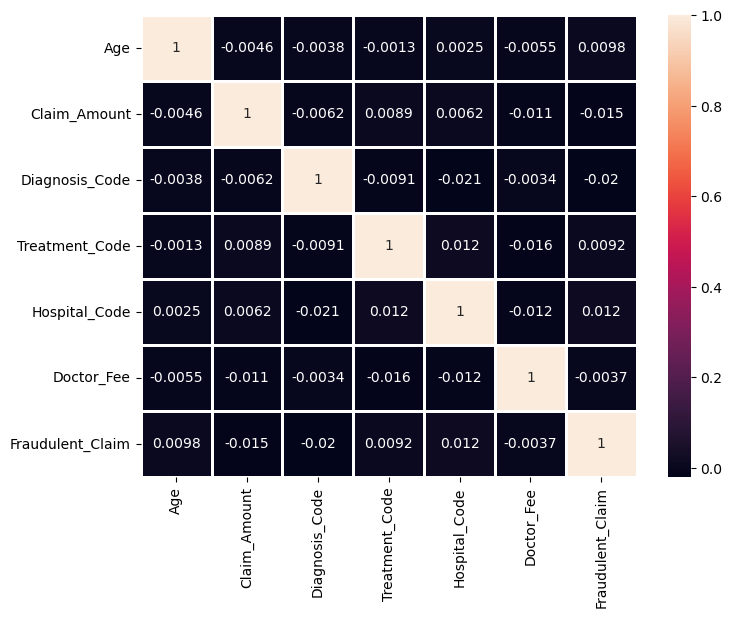

In [9]:
# heatmap

plt.figure(figsize = (8, 6))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

We are not seeing a high degree of correlation between any of the fields

In [11]:
# Get the breakdown of values in the 'Insurance_Type' column
breakdown = df['Insurance_Type'].value_counts()

print(breakdown)

Auto      3347
Health    3341
Home      3312
Name: Insurance_Type, dtype: int64


In [12]:
# Get the breakdown of values in the 'Policy_Type' column
breakdown = df['Policy_Type'].value_counts()

print(breakdown)

Standard    3361
Basic       3320
Premium     3319
Name: Policy_Type, dtype: int64


In [13]:
# Filter the DataFrame to show only rows where Insurance_Type is Home
home_df = df[df['Insurance_Type'] == 'Home']
print(home_df)

      Age  Gender Insurance_Type  Claim_Amount  Diagnosis_Code  \
2      71  Female           Home   14838.51176             907   
8      27    Male           Home   14169.73572             730   
10     39    Male           Home   13184.27196             915   
13     41    Male           Home   13464.40947             317   
17     30    Male           Home   21011.09841             951   
...   ...     ...            ...           ...             ...   
9987   69    Male           Home   17533.45879             875   
9990   65    Male           Home   12190.53651             842   
9993   66  Female           Home   10000.01000             601   
9997   37  Female           Home   11752.39046             527   
9999   30    Male           Home   12694.68238             367   

      Treatment_Code  Hospital_Code  Doctor_Fee Policy_Type  Fraudulent_Claim  
2               8067             54  216.533344     Premium                 0  
8               6182             51  236.213472

C:\Users\mobee\AppData\Local\Temp\ipykernel_21828\1927950387.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)
C:\Users\mobee\AppData\Local\Temp\ipykernel_21828\1927950387.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)
C:\Users\mobee\AppData\Local\T

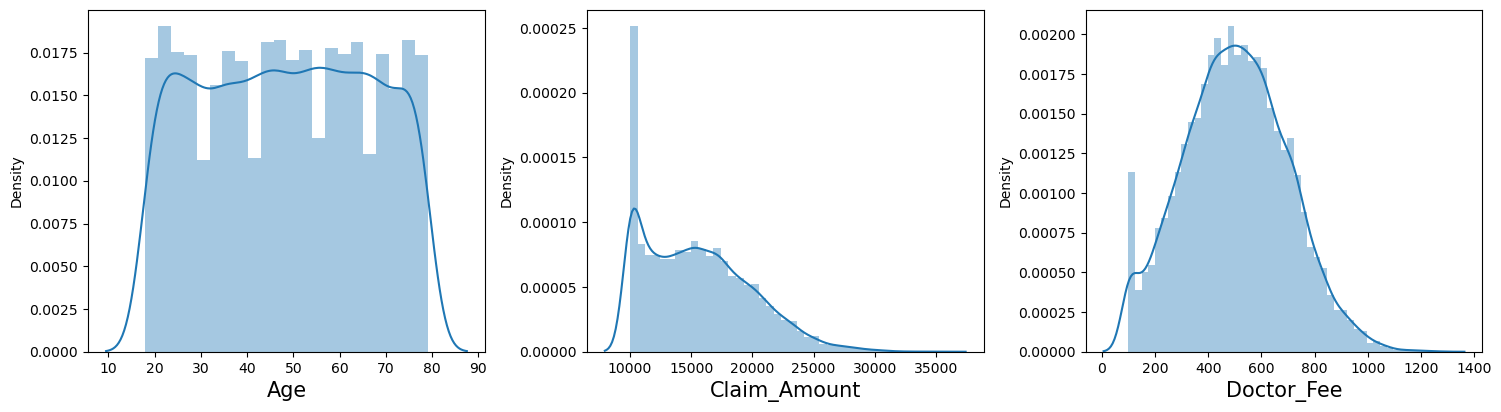

In [15]:
# Define the subset of columns to plot
subset_columns = ['Age', 'Claim_Amount', 'Doctor_Fee']

#plot
plt.figure(figsize=(25, 20))
plotnumber = 1

for col in subset_columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(df[col], kde=True)
        plt.xlabel(col, fontsize=15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

We are seeing many claims in the amount of $10,000. Need to double check and ensure those are real. Let us see a count of them.

In [19]:
# Count rows with Claim_Amount = 10000
claim_amount_10000_count = df[df['Claim_Amount'] == 10000.01000].shape[0]

print(f"Number of rows with Claim_Amounts equal to 10000: {claim_amount_10000_count}")

Number of rows with Claim_Amounts equal to 10000: 1007


For a dataset with 10000 values to have over a thousand with the *exact same* claim amount is suspicious and unlikely. Chances are this value was added as a placeholder or as an equivalent to "null." We will therefore be replacing these 10000 with the average for the column.

In [20]:
# Filter the DataFrame to show only rows where Claim_Amount is 10000
tenkclaims_df = df[df['Claim_Amount'] == 10000.01000]
print(tenkclaims_df)

      Age  Gender Insurance_Type  Claim_Amount  Diagnosis_Code  \
1      65  Female           Auto      10000.01             505   
12     54  Female         Health      10000.01             255   
32     69    Male           Auto      10000.01             988   
39     36  Female           Home      10000.01             923   
43     69  Female           Home      10000.01             394   
...   ...     ...            ...           ...             ...   
9919   28    Male           Auto      10000.01             677   
9925   71  Female           Home      10000.01             368   
9932   47  Female         Health      10000.01             568   
9942   71  Female         Health      10000.01             426   
9993   66  Female           Home      10000.01             601   

      Treatment_Code  Hospital_Code  Doctor_Fee Policy_Type  Fraudulent_Claim  
1               5725             22  976.754644       Basic                 0  
12              8815             71  555.149476

In [22]:
breakdown_tenk = tenkclaims_df['Insurance_Type'].value_counts()

print(breakdown_tenk)

Auto      340
Health    334
Home      333
Name: Insurance_Type, dtype: int64


I wanted to verify that these values were not all tied to a specific insurance type. I have verified that the 10000 values are distributed across all three. Let us now proceed with replacing the 10000 with the average value for the column

In [24]:
# Calculating the average value of the Claim_Amounts column
average_claim_amount = df['Claim_Amount'].mean()
print(average_claim_amount)

15552.51601922


In [25]:
# Replace instances of 10000 with the average value
df.loc[df['Claim_Amount'] == 10000.01000, 'Claim_Amount'] = average_claim_amount

C:\Users\mobee\AppData\Local\Temp\ipykernel_21828\1859621410.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)
C:\Users\mobee\AppData\Local\Temp\ipykernel_21828\1859621410.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)
C:\Users\mobee\AppData\Local\Tem

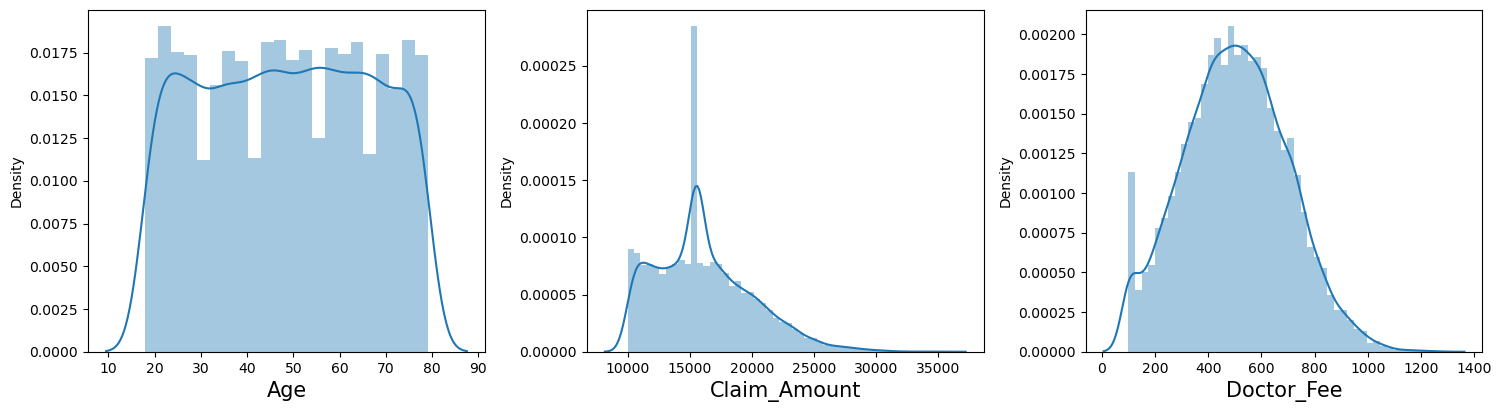

In [26]:
#let's plot the columns again
plt.figure(figsize=(25, 20))
plotnumber = 1

for col in subset_columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(df[col], kde=True)
        plt.xlabel(col, fontsize=15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [27]:
claim_amount_mean_count = df[df['Claim_Amount'] == 15552.51601922].shape[0]

print(f"Number of rows with Claim_Amounts equal to 10000: {claim_amount_mean_count}")

Number of rows with Claim_Amounts equal to 10000: 1007


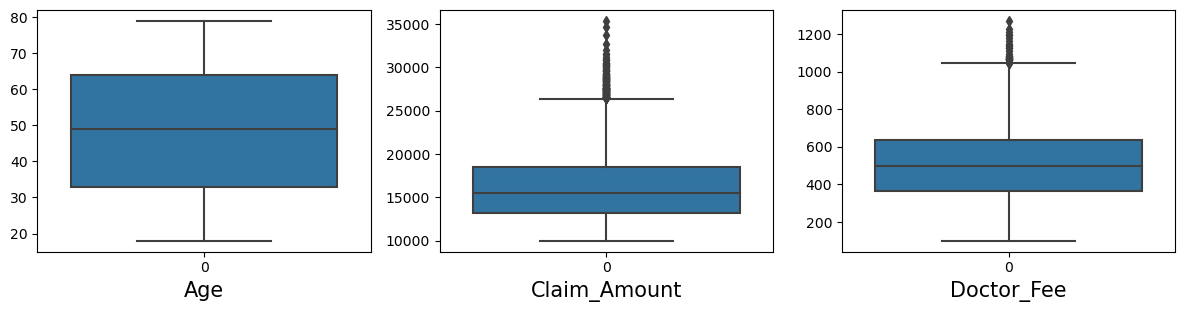

In [29]:
# Define the subset of columns to plot
subset_columns = ['Age', 'Claim_Amount', 'Doctor_Fee']

#checking for outliers
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in subset_columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

Outliers are apparent in Claim_Amount and Doctor_fee

**I am going to begin now defining my features and the target, and setup my training and test data**

In [31]:
# Define the features (X) and the target (y)
X = df.drop('Fraudulent_Claim', axis=1)
y = df['Fraudulent_Claim']

In [32]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X_train:")
print(X_train)
print("\nX_test:")
print(X_test)
print("\ny_train:")
print(y_train)
print("\ny_test:")
print(y_test)

X_train:
      Age  Gender Insurance_Type  Claim_Amount  Diagnosis_Code  \
4901   18    Male           Home  15552.516019             939   
4375   48    Male           Home  17000.534800             442   
6698   64    Male           Home  13483.978170             970   
9805   67    Male         Health  17601.340930             844   
1101   41    Male           Home  17363.452650             154   
...   ...     ...            ...           ...             ...   
5734   48  Female           Auto  13585.976230             468   
5191   57    Male           Auto  18754.327410             675   
5390   47  Female           Auto  17759.306720             634   
860    76  Female         Health  10315.129910             401   
7270   73    Male           Home  11680.099270             804   

      Treatment_Code  Hospital_Code  Doctor_Fee Policy_Type  
4901            1444             11  480.410173       Basic  
4375            8096             23  243.807300     Premium  
6698        

*We have complete preprocessing and are now ready to begin modeling*